In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [3]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [5]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].dropna()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [7]:
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)


In [13]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f2_score = fbeta_score(y_test, y_pred, beta=2)
cm = confusion_matrix(y_test, y_pred)


In [15]:
recall = recall_score(y_test, y_pred)
f2_score = fbeta_score(y_test, y_pred, beta=2)
cm = confusion_matrix(y_test, y_pred)

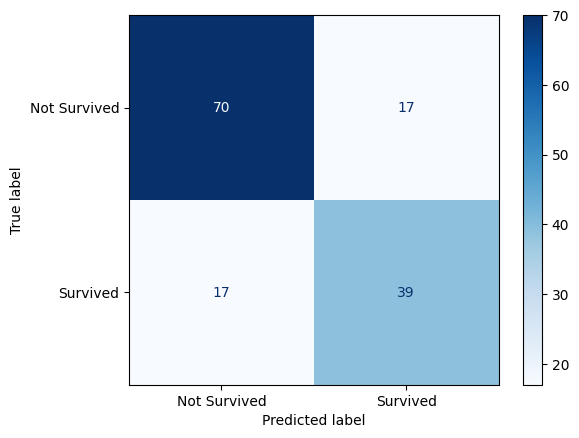

Recall: 0.70
F2-Score: 0.70
Accuracy: 0.76


In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap="Blues")
plt.show()

# Print metrics
print(f"Recall: {recall:.2f}")
print(f"F2-Score: {f2_score:.2f}")
print(f"Accuracy: {accuracy:.2f}")


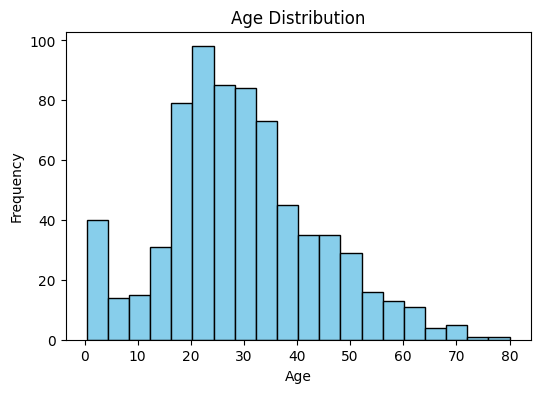

In [32]:
# Histogram: Age distribution
plt.figure(figsize=(6, 4))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


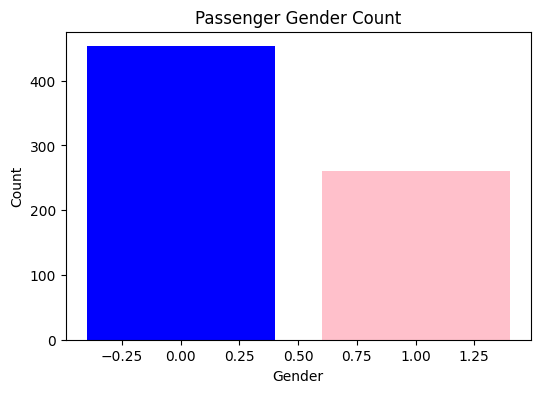

In [36]:
# Bar Chart: Gender count
gender_counts = df['Sex'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.title("Passenger Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
